In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
# Load datasets
variable_definitions = pd.read_csv('../data/Xente_Variable_Definitions.csv')
data = pd.read_csv('../data/data.csv')

# Display basic information
print("Variable Definitions Sample:")
display(variable_definitions.head())

print("Transaction Data Overview:")
data.head()


Variable Definitions Sample:


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


Transaction Data Overview:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Shape of the data
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Data types and non-null counts
data.info()

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Number of rows: 95662
Number of columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       9566

In [5]:
# Summary statistics for numerical columns
data.describe()

# Summary for categorical columns
categorical_cols = data.select_dtypes(include='object')
categorical_cols.describe()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


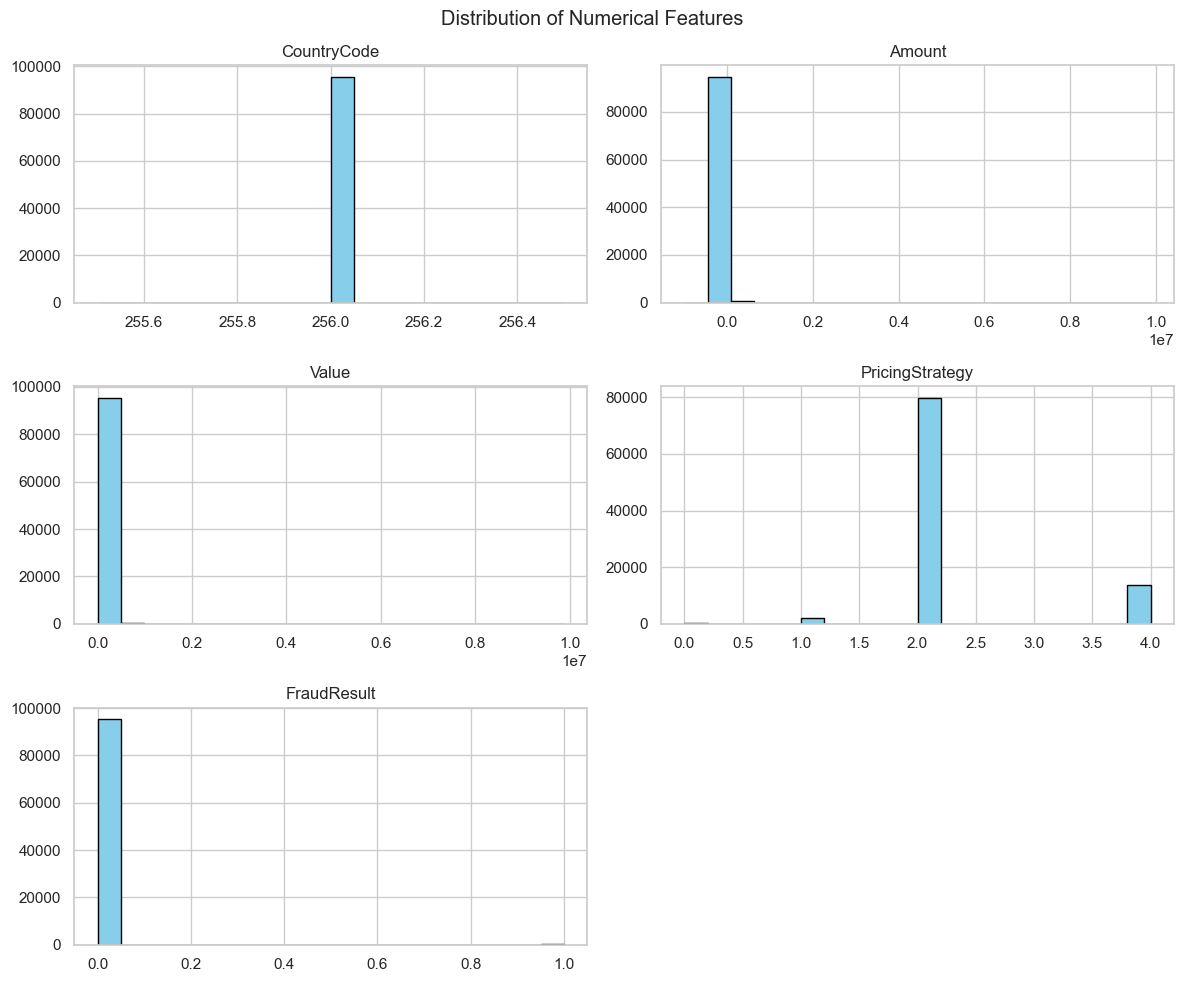

In [6]:
# Histogram for each numerical column
numerical_cols = data.select_dtypes(include=np.number)
numerical_cols.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()


In [7]:
# Function to plot top N categories for each categorical column
def plot_top_categories(data, categorical_cols, top_n=10):
    for col in categorical_cols.columns:
        # Get the top N categories and count of "Others"
        top_categories = data[col].value_counts().nlargest(top_n)
        others_count = data[col].value_counts()[top_n:].sum()
        
        # Prepare data for plotting
        plot_data = pd.concat([top_categories, pd.Series({"Others": others_count})])
        
        # Plot the bar chart
        plt.figure(figsize=(8, 4))
        sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")
        plt.title(f"Top {top_n} Categories for {col}")
        plt.xlabel('Frequency')
        plt.ylabel(col)
        plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


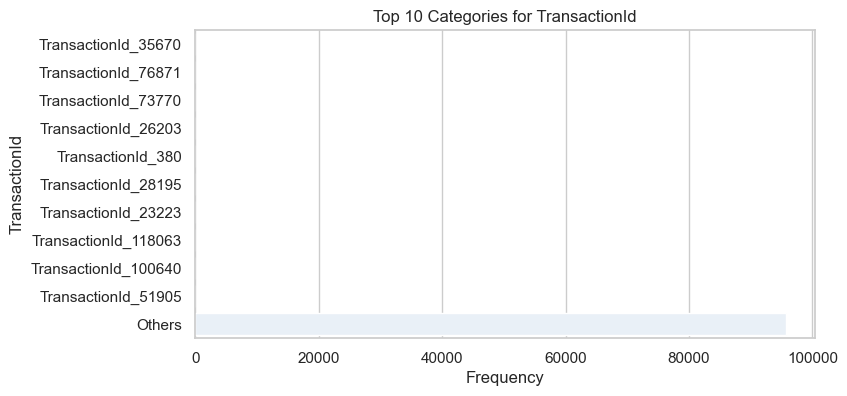

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


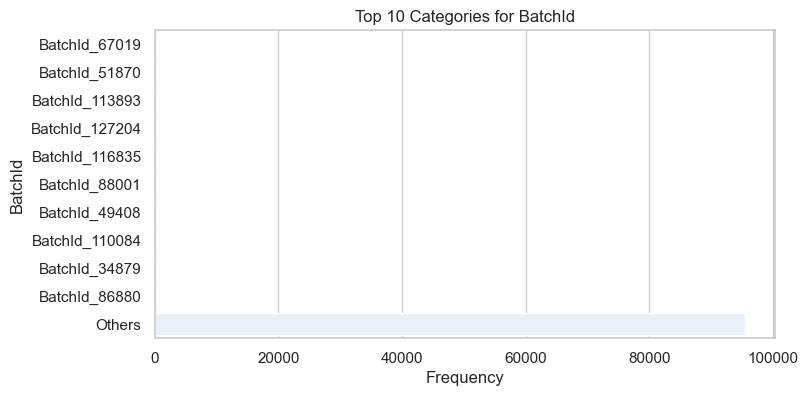

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


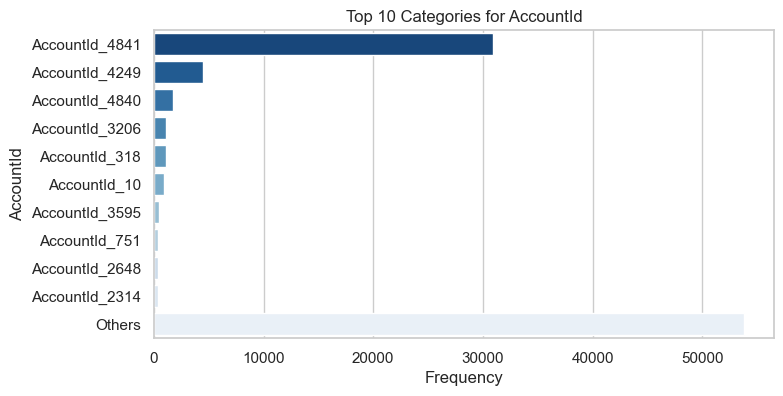

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


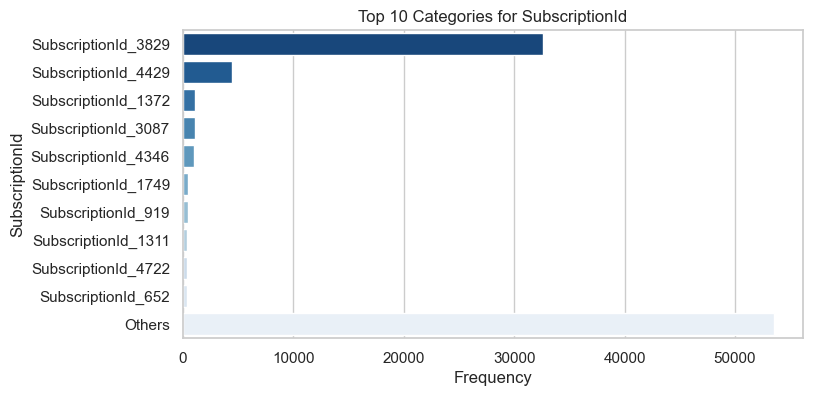

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


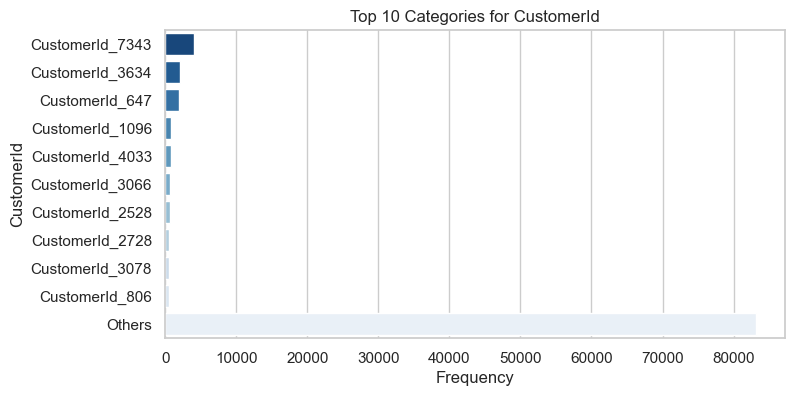

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


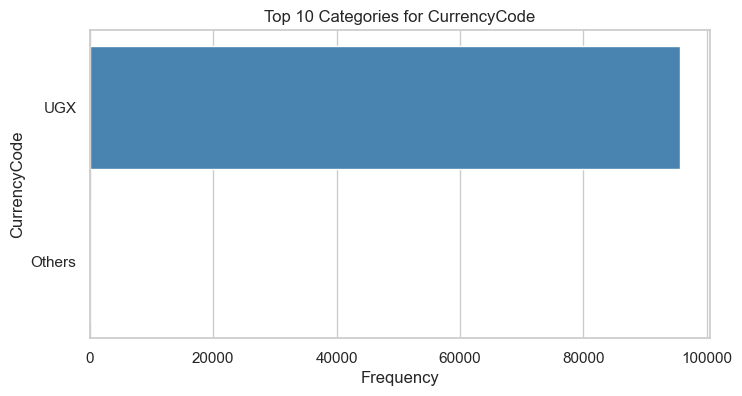

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


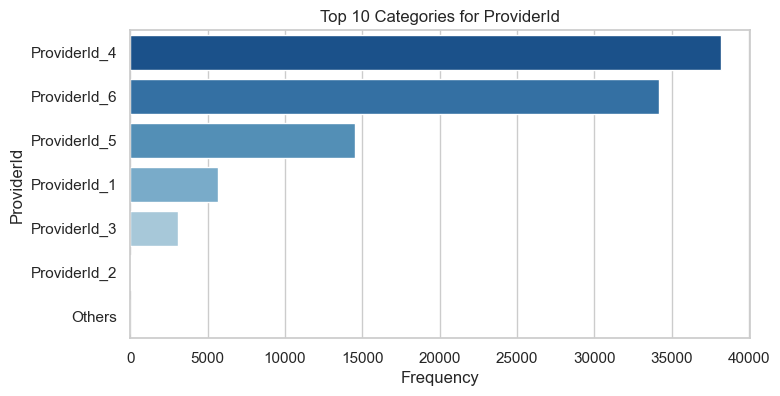

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


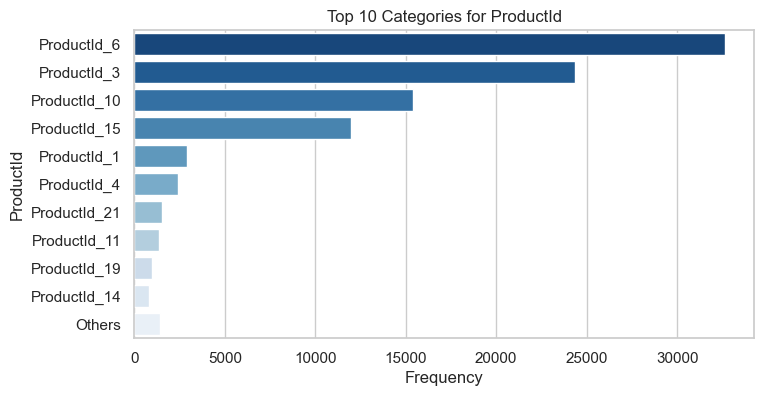

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


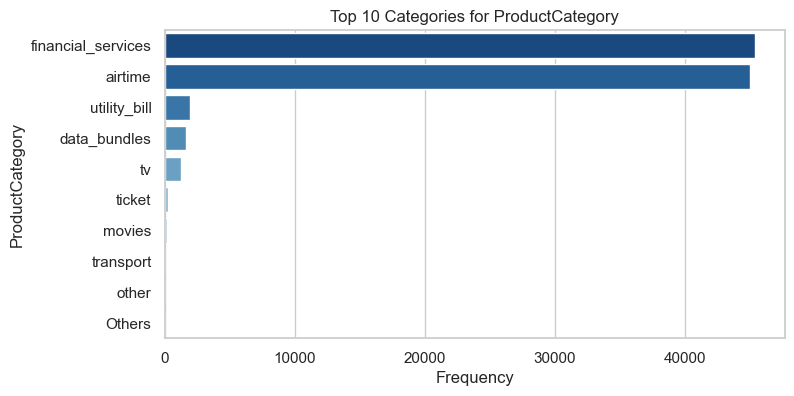

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


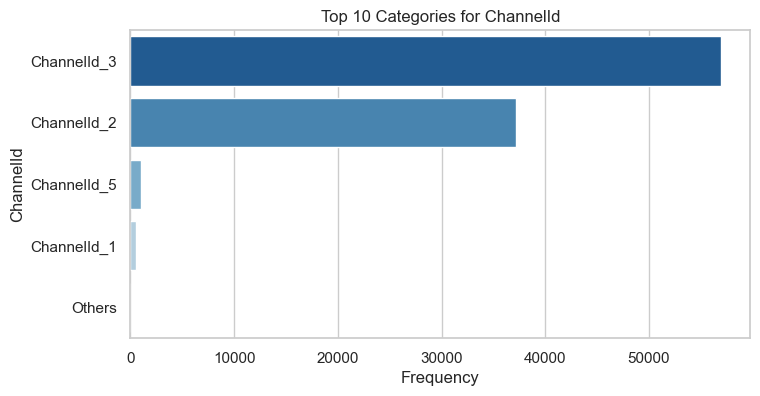

C:\Users\hp\AppData\Local\Temp\ipykernel_10788\786717879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="Blues_r")


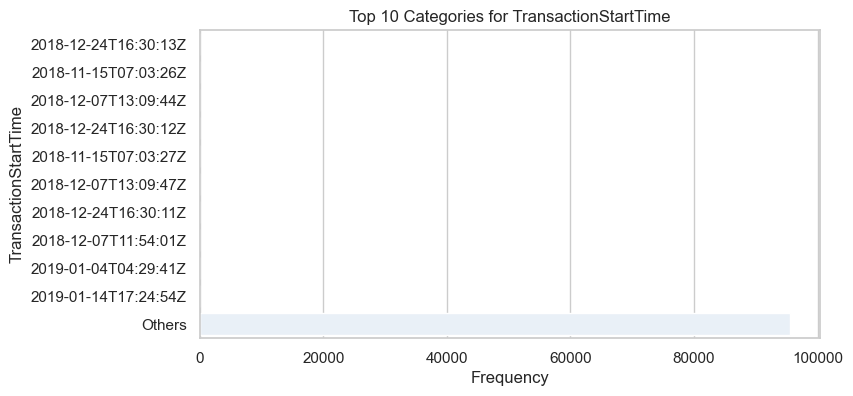

In [8]:
plot_top_categories(data, categorical_cols, top_n=10)


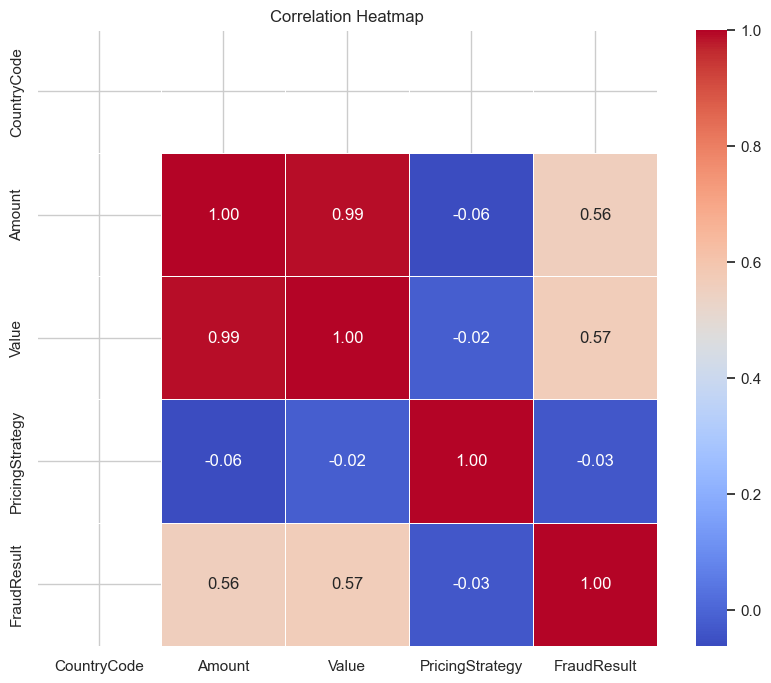

In [9]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


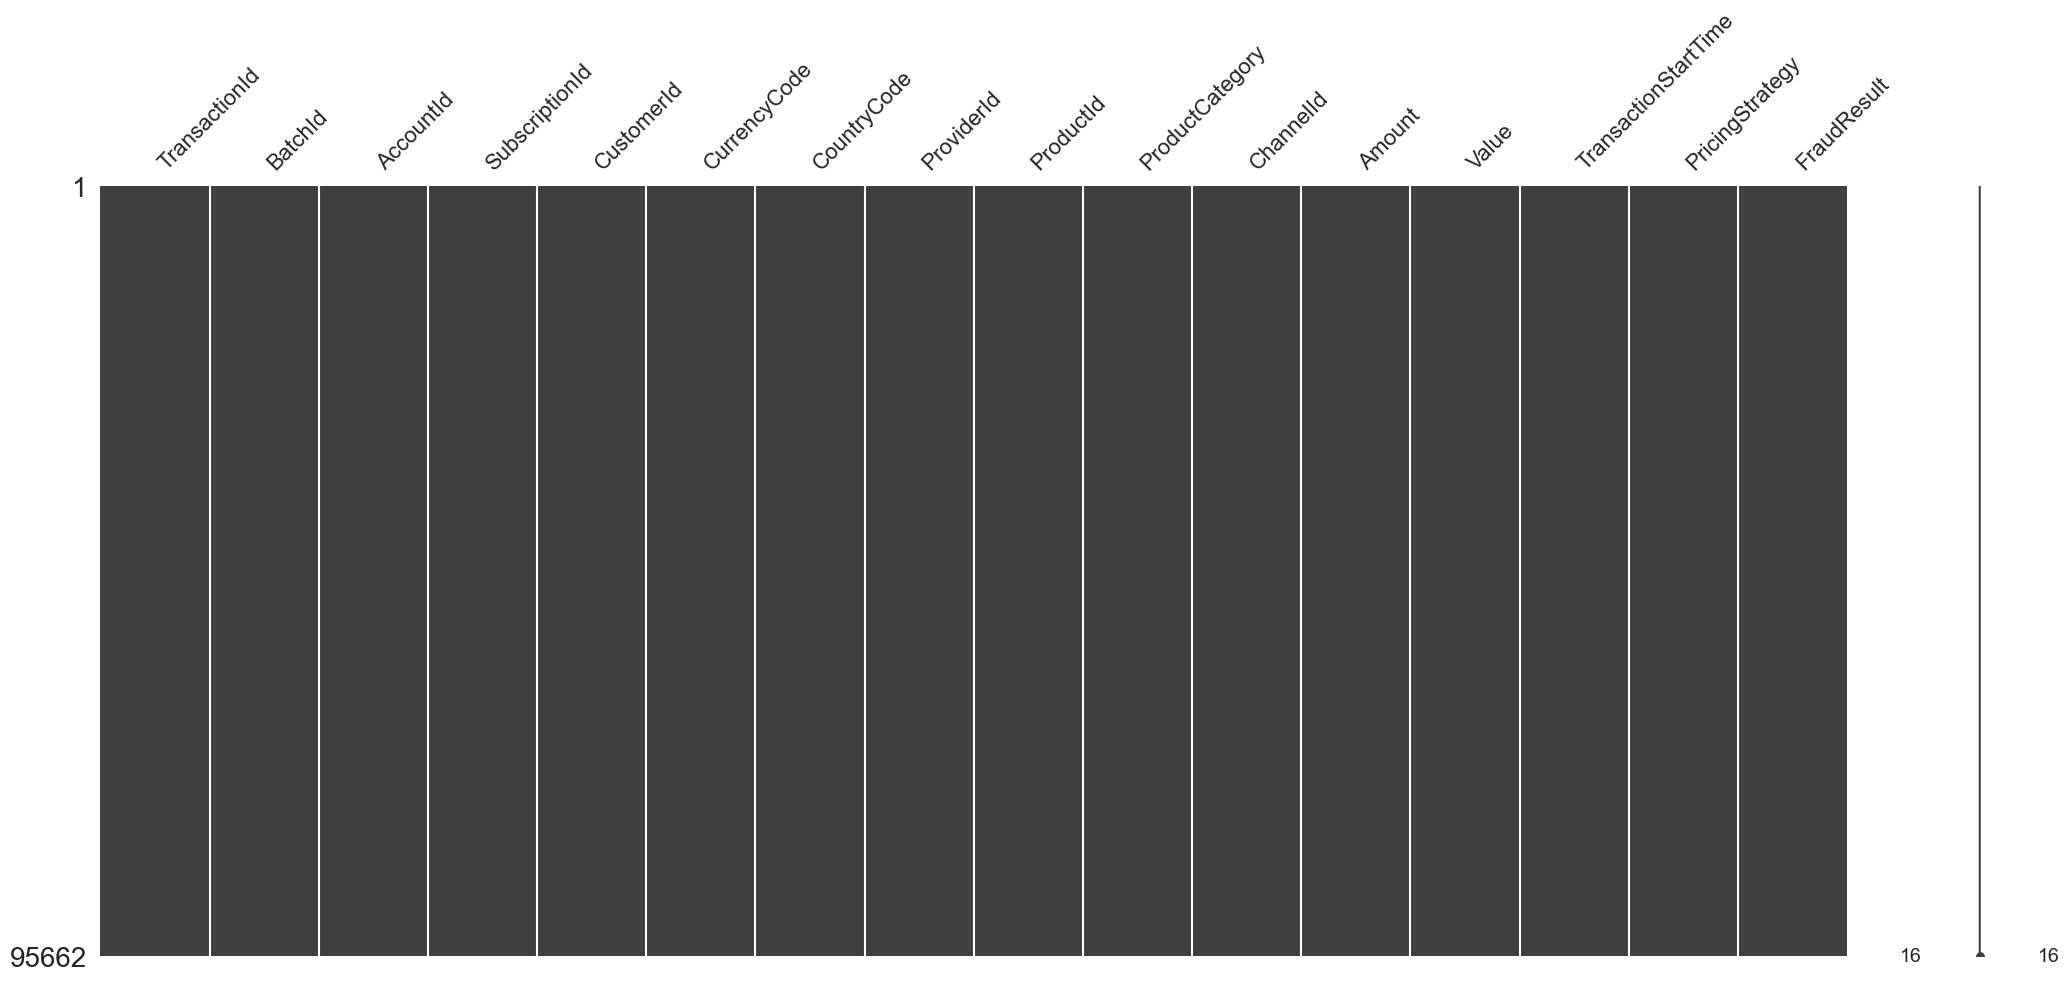

c:\Users\hp\Documents\BatiBank-CreditRisk\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\hp\Documents\BatiBank-CreditRisk\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


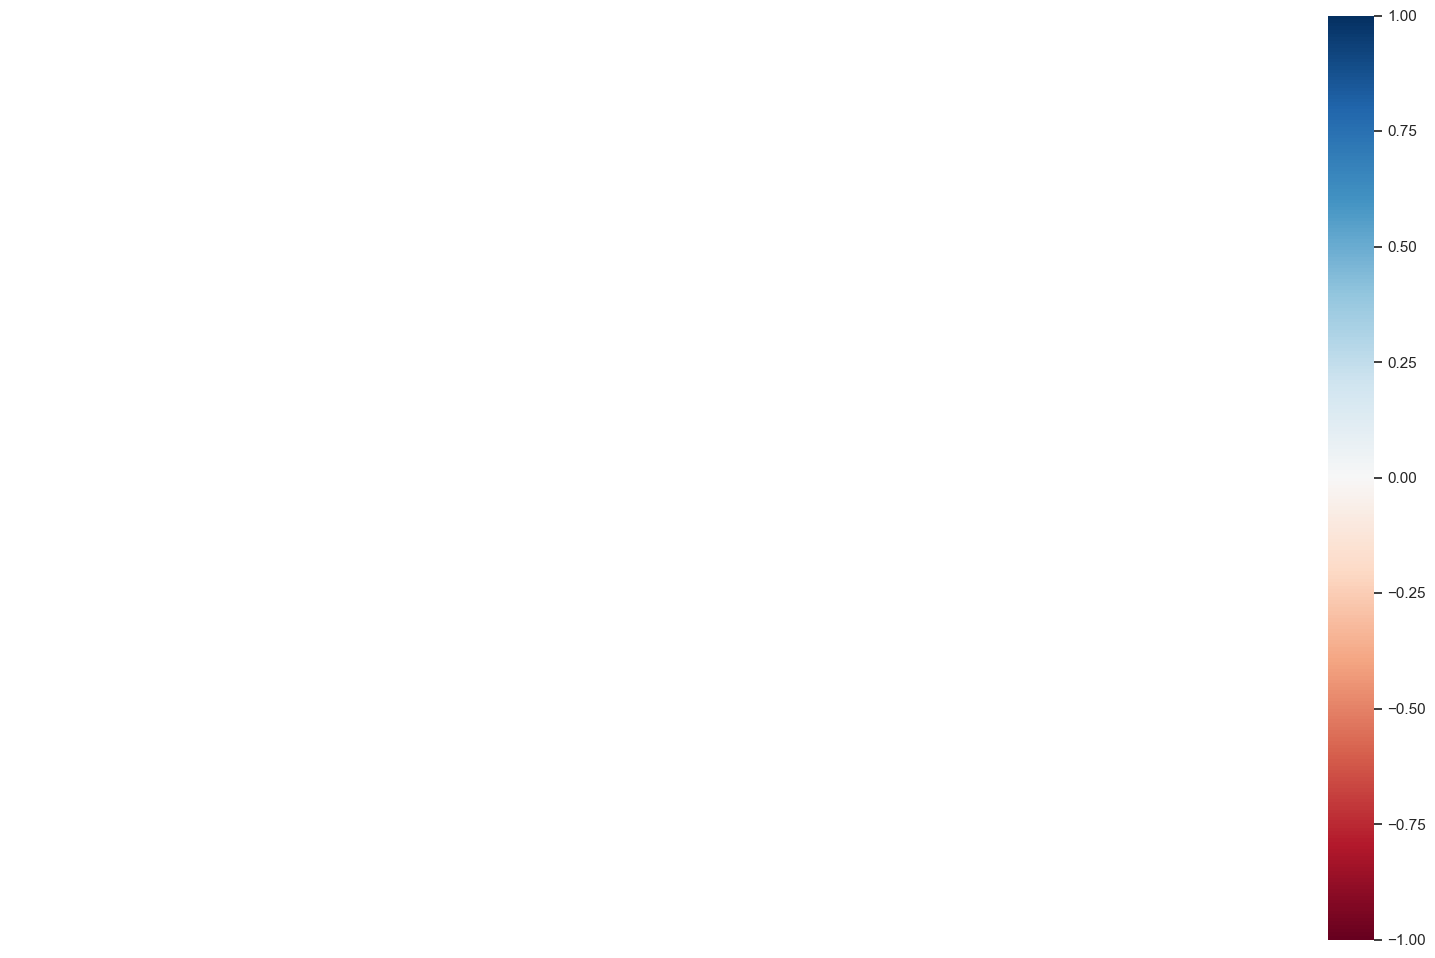

Missing Values (%):
Series([], dtype: float64)


In [10]:
# Visualize missing values
msno.matrix(data)
plt.show()

msno.heatmap(data)
plt.show()

# Percentage of missing values per column
missing_values = data.isnull().mean() * 100
print("Missing Values (%):")
print(missing_values[missing_values > 0])


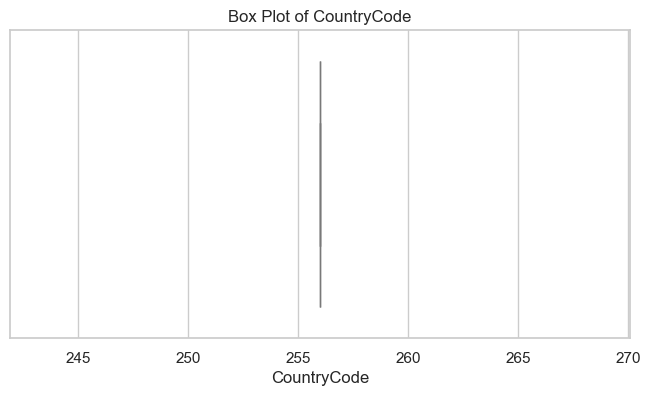

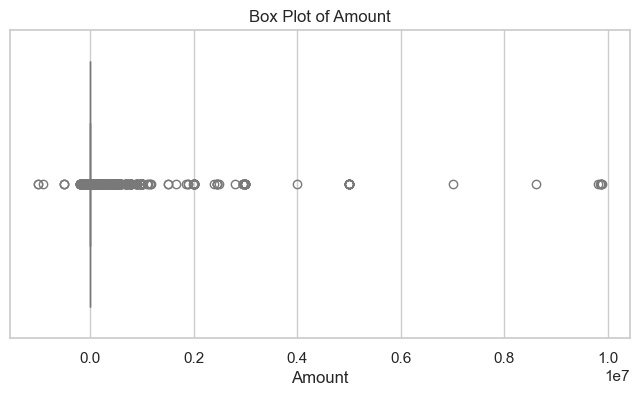

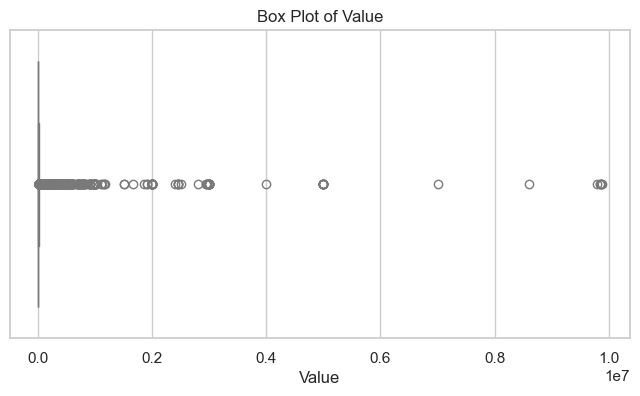

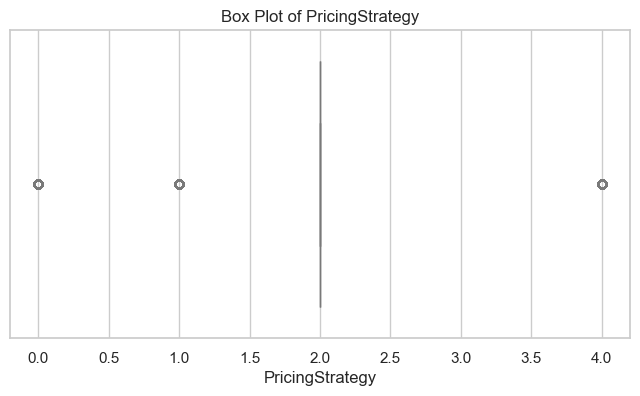

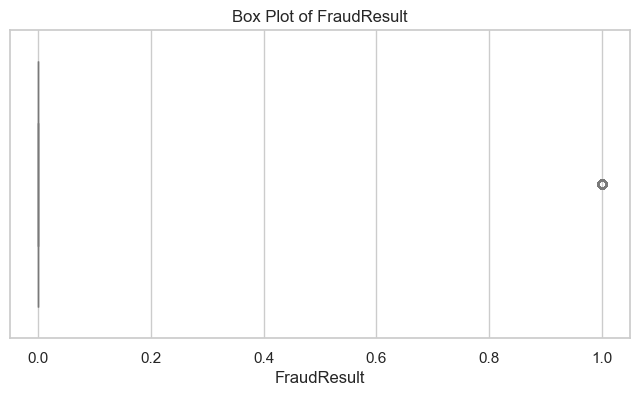

In [11]:
# Box plots for numerical columns
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f"Box Plot of {col}")
    plt.show()
